## DBSCAN - Denstiy Based Spatial Clustering of Applications with Noise

### Introduction to DBSCAN

DBSCAN has simple-intuitive Algo. but has effective clustering performance even with complex geometric dataset.  
why? - DBSCAN Algo. is based on data density of specific space

4 type of data points  
- Core Point  
- Neighbor Point  
- Border Point  
- Noise Point  

Hyperparameters  
- eps[Default=0.5]: Radius of marginal circular region around data  
- min_samples[Default=5]: min # of samples in a neighborhood. This includes the point itself.

### Applying DBSCAN using Iris_data

In [1]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

iris_df = pd.DataFrame(data=iris.data, columns=feature_names)
iris_df['target'] = iris.target

In [2]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['dbscan_cluster'] = dbscan_labels

iris_df.groupby(['target'])['dbscan_cluster'].value_counts()

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64

-1 cluster label: Noise Point  
there are 2 clusters after applying DBSCAN.  

In [3]:
### Source Code from ml-definitive-guide-master ###
## Visualize Clustering Results or make_blobs()
# Function Factors
# clusterobj: Sklearn clustering Class object after fit_predict.
# dataframe: feature-label dataframe
# label_name: label_name
# iscenter: If cluster class object offer cluster centroid, True

def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

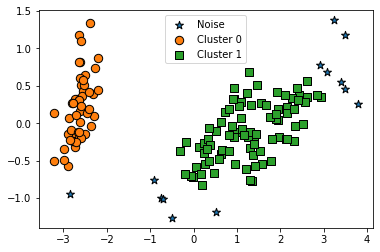

In [4]:
# For 2D visualization apply PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

iris_df['ftr1'] = pca_transformed[:,0]
iris_df['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


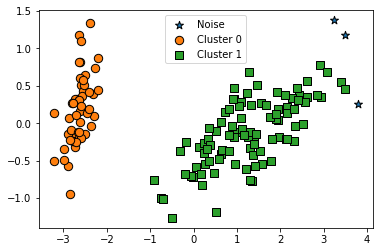

In [5]:
# Increase eps=0.6 to eps=0.8
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['dbscan_cluster'] = dbscan_labels

iris_result = iris_df.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter=False)

In [6]:
iris_df.groupby(['target'])['dbscan_cluster'].value_counts()

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


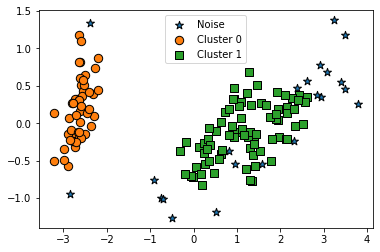

In [7]:
# Increase min_samples=8 -> 16
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['dbscan_cluster'] = dbscan_labels

iris_result = iris_df.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter=False)

In [8]:
iris_df.groupby(['target'])['dbscan_cluster'].value_counts()

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64

### Apply DBSCAN using make_circles() dataset

make_circles() only generate 2 features dataset.  
- noise[default=None]: ratio of noise dataset  
- factor[default=0.8]: scale ratio between inner/outer circle

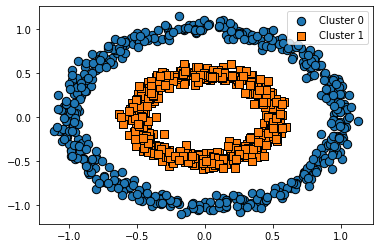

In [10]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, factor=0.5)
cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y

visualize_cluster_plot(None, cluster_df, 'target', iscenter=False)

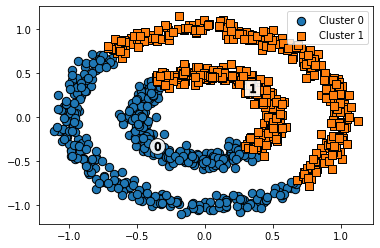

In [11]:
# Clustering make_circle() dataset using K-Means 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans_labels = kmeans.fit_predict(X)
cluster_df['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, cluster_df, 'kmeans_cluster', iscenter=True)

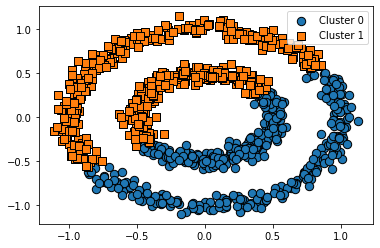

In [12]:
# Clustering make_circle() dataset using GMM  
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
cluster_df['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, cluster_df, 'gmm_cluster', iscenter=False)

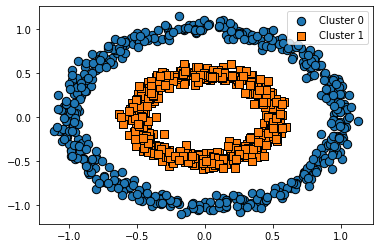

In [13]:
# Clustering make_circle() dataset using DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
cluster_df['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, cluster_df, 'dbscan_cluster', iscenter=False)